In [67]:
import polars as pl
import matplotlib.pyplot as plt

In [68]:
df = pl.read_csv("../data/raw_data/pageviews-20200701-20251201.csv")
df

Date,Matcha,Bubble tea,Tea,Hot chocolate,Espresso,Latte macchiato,Cappuccino,Chai latte,Pumpkin spice latte,Iced coffee
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""2020-07-01""",1969,2012,1944,219,958,215,812,4,2,282
"""2020-07-02""",1960,2085,1858,214,854,198,861,4,0,309
"""2020-07-03""",1920,2204,1940,198,998,181,869,2,0,234
"""2020-07-04""",1822,2119,1969,239,1001,222,831,2,3,281
"""2020-07-05""",1954,2176,1940,210,993,249,852,1,3,313
…,…,…,…,…,…,…,…,…,…,…
"""2025-11-27""",3209,1249,1239,476,756,200,769,1,252,131
"""2025-11-28""",3584,1592,1239,565,805,250,774,3,237,141
"""2025-11-29""",3528,1200,1218,548,803,286,827,2,283,134


In [69]:
df_long = (
    df
    .unpivot(
        index=["Date"],
        variable_name="Drink",
        value_name="Views"
    )
)

df_long

Date,Drink,Views
str,str,i64
"""2020-07-01""","""Matcha""",1969
"""2020-07-02""","""Matcha""",1960
"""2020-07-03""","""Matcha""",1920
"""2020-07-04""","""Matcha""",1822
"""2020-07-05""","""Matcha""",1954
…,…,…
"""2025-11-27""","""Iced coffee""",131
"""2025-11-28""","""Iced coffee""",141
"""2025-11-29""","""Iced coffee""",134


In [70]:
df_long = df_long.with_columns(pl.col('Date').cast(pl.Date))
df_long

Date,Drink,Views
date,str,i64
2020-07-01,"""Matcha""",1969
2020-07-02,"""Matcha""",1960
2020-07-03,"""Matcha""",1920
2020-07-04,"""Matcha""",1822
2020-07-05,"""Matcha""",1954
…,…,…
2025-11-27,"""Iced coffee""",131
2025-11-28,"""Iced coffee""",141
2025-11-29,"""Iced coffee""",134


In [71]:
df_long.write_parquet("../data/processed_data/df_long.parquet")

In [72]:
df_summary = df_long.group_by('Drink').agg(pl.col('Views').sum())
drinks = df_long['Drink'].unique().to_list()
data = [df_long.filter(pl.col('Drink') == drink)['Views'].to_list() for drink in drinks]

C:\Users\maria\AppData\Local\Temp\ipykernel_6168\829093025.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(data, labels=drinks)


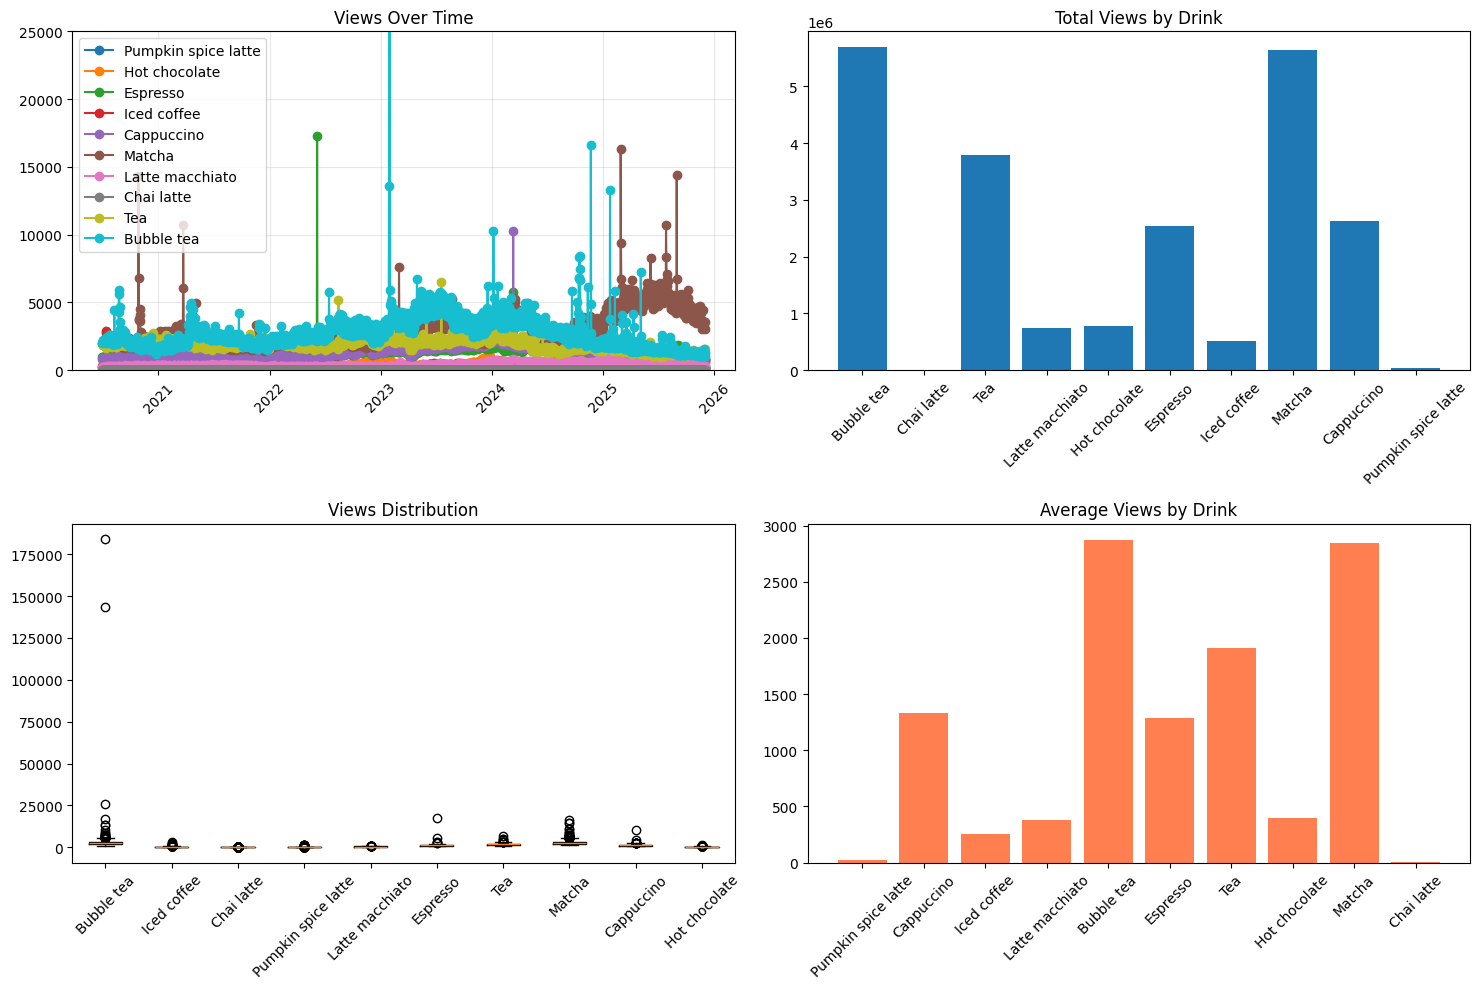

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Line plot
for drink in df_long['Drink'].unique():
    df_drink = df_long.filter(pl.col('Drink') == drink)
    axes[0, 0].plot(df_drink['Date'], df_drink['Views'], marker='o', label=drink)
axes[0, 0].set_title('Views Over Time')
axes[0, 0].legend()
axes[0, 0].set_ylim((0, 25000))
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Bar chart
axes[0, 1].bar(df_summary['Drink'], df_summary['Views'])
axes[0, 1].set_title('Total Views by Drink')
axes[0, 1].tick_params(axis='x', rotation=45)

# Box plot
axes[1, 0].boxplot(data, labels=drinks)
axes[1, 0].set_title('Views Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Average views by drink
df_avg = df_long.group_by('Drink').agg(pl.col('Views').mean())
axes[1, 1].bar(df_avg['Drink'], df_avg['Views'], color='coral')
axes[1, 1].set_title('Average Views by Drink')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [80]:
from typing import Tuple


def filter_out_drink(df: pl.DataFrame, drink_name: str) -> Tuple[pl.DataFrame, pl.DataFrame]:
    """
    Filter out a specific drink from the dataframe
    
    Args:
        df: Input dataframe
        drink_name: Name of the drink to filter out (Drink)
        
    Returns:
        Tuple of (df_without_drink, df_drink_only)
    """
    df_without_drink = df.filter(pl.col("Drink") != drink_name)
    df_drink_only = df.filter(pl.col("Drink") == drink_name)
    
    print(f"Filtered out '{drink_name}':")
    print(f"  Remaining drinks: {df_without_drink.shape[0]} rows")
    print(f"  Filtered drink: {df_drink_only.shape[0]} rows")
    
    return df_without_drink, df_drink_only

In [ ]:
def add_drink_back(df_processed: pl.DataFrame, df_drink: pl.DataFrame) -> pl.DataFrame:
    """
    Add a drink back into the processed dataframe
    
    Args:
        df_processed: Processed dataframe (after outlier capping, etc.)
        df_drink: Drink dataframe to add back
        
    Returns:
        Combined dataframe with drink added back
    """
    
    # Cast df_drink's 'Views' column to match df_processed's type
    df_drink = df_drink.with_columns(
        pl.col("Views").cast(df_processed["Views"].dtype)
    )
    
    df_combined = pl.concat([df_processed, df_drink])
    
    # Sort by Drink and Date to keep it organized
    df_combined = df_combined.sort(["Drink", "Date"])
    
    print(f"Added drink back:")
    print(f"  Total rows: {df_combined.shape[0]}")
    print(f"  Total drinks: {df_combined['Drink'].n_unique()}")
    
    return df_combined

In [89]:
def cap_outliers_iqr(df, column='Views', group_by='Drink', factor=1.5):
    """Cap outliers using IQR method for each drink separately"""
    
    result = df.clone()
    
    for drink in df[group_by].unique():
        mask = df[group_by] == drink
        values = df.filter(mask)[column]
        
        q1 = values.quantile(0.25)
        q3 = values.quantile(0.75)
        iqr = q3 - q1
        
        lower_bound = q1 - factor * iqr
        upper_bound = q3 + factor * iqr
        
        # Cap the values
        result = result.with_columns(
            pl.when((pl.col(group_by) == drink) & (pl.col(column) > upper_bound))
            .then(upper_bound)
            .when((pl.col(group_by) == drink) & (pl.col(column) < lower_bound))
            .then(lower_bound)
            .otherwise(pl.col(column))
            .alias(column)
        )
    
    return result

In [83]:
def cap_outliers_percentile(df, column='Views', lower=1, upper=99):
    """Cap outliers using percentile method"""
    
    lower_bound = df[column].quantile(lower/100)
    upper_bound = df[column].quantile(upper/100)
    
    return df.with_columns(
        pl.col(column).clip(lower_bound, upper_bound).alias(column)
    )

In [84]:
def cap_outliers_zscore(df, column='Views', threshold=3):
    """Cap outliers using z-score method"""
    
    mean = df[column].mean()
    std = df[column].std()
    
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    
    return df.with_columns(
        pl.col(column).clip(lower_bound, upper_bound).alias(column)
    )

In [85]:
df_without_PumpkinSpiceLatte, df_PumpkinSpiceLatte = filter_out_drink(df_long, "Pumpkin spice latte")

Filtered out 'Pumpkin spice latte':
  Remaining drinks: 17820 rows
  Filtered drink: 1980 rows


In [86]:
df_iqr = cap_outliers_iqr(df_without_PumpkinSpiceLatte, factor=1.5)
df_percentile = cap_outliers_percentile(df_without_PumpkinSpiceLatte, lower=5, upper=85)
df_zscore = cap_outliers_zscore(df_without_PumpkinSpiceLatte, threshold=3)

In [90]:
df_iqr = add_drink_back(df_iqr, df_PumpkinSpiceLatte)
df_percentile = add_drink_back(df_percentile, df_PumpkinSpiceLatte)
df_zscore = add_drink_back(df_zscore, df_PumpkinSpiceLatte)

Added drink back:
  Total rows: 19800
  Total drinks: 10
Added drink back:
  Total rows: 19800
  Total drinks: 10
Added drink back:
  Total rows: 19800
  Total drinks: 10


In [91]:
df_capped = df_iqr

In [93]:
df_summary = df_capped.group_by('Drink').agg(pl.col('Views').sum())
drinks = df_capped['Drink'].unique().to_list()
data = [df_capped.filter(pl.col('Drink') == drink)['Views'].to_list() for drink in drinks]

C:\Users\maria\AppData\Local\Temp\ipykernel_6168\4170793289.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(data, labels=drinks)


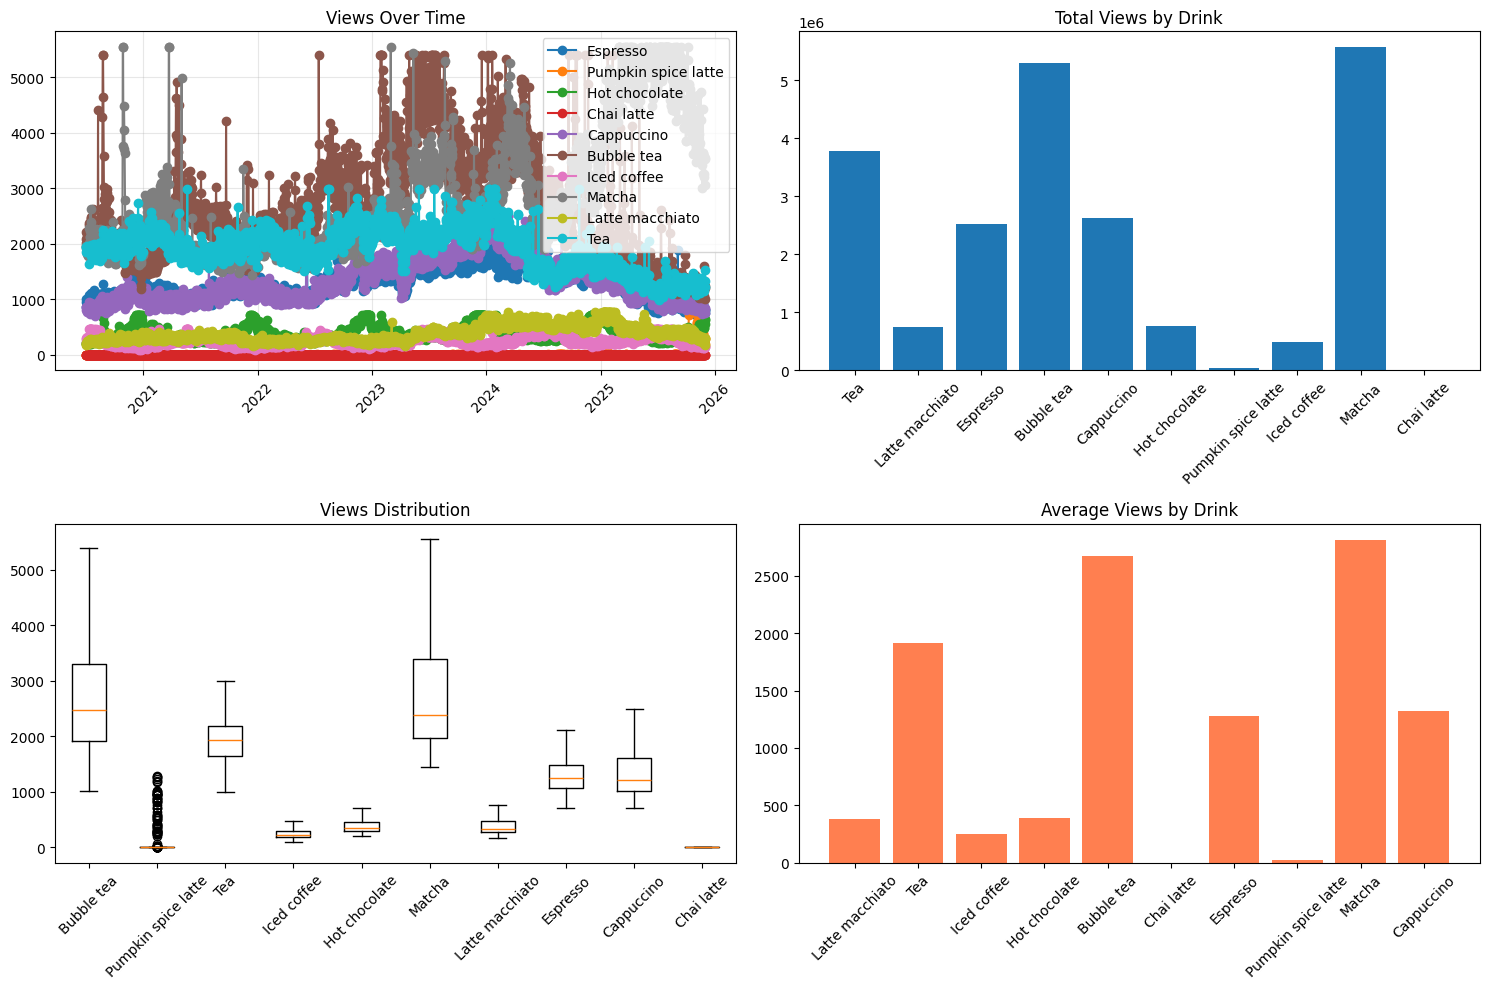

In [94]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Line plot
for drink in df_capped['Drink'].unique():
    df_drink = df_capped.filter(pl.col('Drink') == drink)
    axes[0, 0].plot(df_drink['Date'], df_drink['Views'], marker='o', label=drink)
axes[0, 0].set_title('Views Over Time')
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Bar chart
axes[0, 1].bar(df_summary['Drink'], df_summary['Views'])
axes[0, 1].set_title('Total Views by Drink')
axes[0, 1].tick_params(axis='x', rotation=45)

# Box plot
axes[1, 0].boxplot(data, labels=drinks)
axes[1, 0].set_title('Views Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Average views by drink
df_avg = df_capped.group_by('Drink').agg(pl.col('Views').mean())
axes[1, 1].bar(df_avg['Drink'], df_avg['Views'], color='coral')
axes[1, 1].set_title('Average Views by Drink')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [95]:
for drink in df_capped['Drink'].unique():
    df_drink = df_capped.filter(pl.col('Drink') == drink)
    date_range = pl.date_range(
        df_drink['Date'].min(), 
        df_drink['Date'].max(), 
        interval='1d',
        eager=True
    )
    expected_days = len(date_range)
    actual_days = df_drink.shape[0]
    missing_days = expected_days - actual_days
    
    print(f"{drink}: {missing_days} missing days (have {actual_days}, expect {expected_days})")


Latte macchiato: 0 missing days (have 1980, expect 1980)
Iced coffee: 0 missing days (have 1980, expect 1980)
Bubble tea: 0 missing days (have 1980, expect 1980)
Matcha: 0 missing days (have 1980, expect 1980)
Hot chocolate: 0 missing days (have 1980, expect 1980)
Chai latte: 0 missing days (have 1980, expect 1980)
Tea: 0 missing days (have 1980, expect 1980)
Espresso: 0 missing days (have 1980, expect 1980)
Cappuccino: 0 missing days (have 1980, expect 1980)
Pumpkin spice latte: 0 missing days (have 1980, expect 1980)


In [96]:
df_capped = df_capped.sort(['Drink', 'Date'])
df_capped

Date,Drink,Views
date,str,f64
2020-07-01,"""Bubble tea""",2012.0
2020-07-02,"""Bubble tea""",2085.0
2020-07-03,"""Bubble tea""",2204.0
2020-07-04,"""Bubble tea""",2119.0
2020-07-05,"""Bubble tea""",2176.0
…,…,…
2025-11-27,"""Tea""",1239.0
2025-11-28,"""Tea""",1239.0
2025-11-29,"""Tea""",1218.0


In [97]:
df_capped = df_capped.rename({"Date": "ds", "Drink": "unique_id", "Views": "y"})

In [98]:
df_capped

ds,unique_id,y
date,str,f64
2020-07-01,"""Bubble tea""",2012.0
2020-07-02,"""Bubble tea""",2085.0
2020-07-03,"""Bubble tea""",2204.0
2020-07-04,"""Bubble tea""",2119.0
2020-07-05,"""Bubble tea""",2176.0
…,…,…
2025-11-27,"""Tea""",1239.0
2025-11-28,"""Tea""",1239.0
2025-11-29,"""Tea""",1218.0


In [99]:
df_capped.write_parquet("../data/processed_data/df_outliers_capped.parquet")

In [100]:
from typing import Dict
from utilsforecast.feature_engineering import fourier, trend
import holidays

In [101]:
H = 31  # Forecasting 31 days (all of January)
FREQ = "1d"   
SEASON_LENGTH = 7 #Weekly seasonality for now

In [ ]:
def create_holiday_features(start_date: str = "2020-07-01", end_date: str = "2026-01-31") -> pl.DataFrame:
    """
    Create holiday features for the US (adjust country as needed)
    
    Args:
        start_date: Start date for holiday range
        end_date: End date for holiday range
    
    Returns:
        DataFrame with holiday information
    """
    # Get US holidays (change to your country if needed)
    us_holidays = holidays.US(years=range(2020, 2027))
    
    # Create date range
    date_range = pl.date_range(
        start = pl.Series([start_date]).cast(pl.Date)[0],
        end = pl.Series([end_date]).cast(pl.Date)[0],
        interval="1d",
        eager=True
    )
    
    # Create holiday dataframe
    holiday_df = pl.DataFrame({
        "ds": date_range
    })
    
    # Add holiday indicators
    holiday_df = holiday_df.with_columns([
        # Is it a holiday?
        pl.col("ds").map_elements(lambda x: x in us_holidays, return_dtype=pl.Boolean).alias("is_holiday"),
        
        # Holiday name (empty string if not a holiday)
        pl.col("ds").map_elements(lambda x: us_holidays.get(x, ""), return_dtype=pl.String).alias("holiday_name"),
        
        # Days until next holiday
        pl.col("ds").map_elements(
            lambda x: min([abs((h - x).days) for h in us_holidays.keys() if (h - x).days > 0] + [365]),
            return_dtype=pl.Int64
        ).alias("days_to_holiday"),
        
        # Days since last holiday
        pl.col("ds").map_elements(
            lambda x: min([abs((x - h).days) for h in us_holidays.keys() if (x - h).days > 0] + [365]),
            return_dtype=pl.Int64
        ).alias("days_since_holiday"),
    ])
    
    # Count number of holidays in a rolling window (e.g., next 7 days)
    holiday_df = holiday_df.with_columns([
        pl.col("is_holiday").cast(pl.Int64).alias("num_holidays")
    ])
    
    return holiday_df

In [103]:
def split_train_test(df: pl.DataFrame, val_start: str = "2024-01-01", val_end: str = "2025-01-01") -> Dict[str, pl.DataFrame]:
    """
    Split data into train and validation sets
    
    Args:
        df: Input dataframe in utilsforecast format
        val_start: Start date for validation set
        val_end: End date for validation set start date for test
        
    Returns:
        Dictionary with 'train', 'val' and 'test' splits
    """
    val_start = pl.Series([val_start]).cast(pl.Date)[0]
    val_end = pl.Series([val_end]).cast(pl.Date)[0]

    return {
        "train": df.filter(pl.col("ds") < val_start),
        "val": df.filter((pl.col("ds") >= val_start)&( pl.col("ds") < val_end)),
        "test": df.filter(pl.col("ds") >= val_end)
    }

In [104]:
def make_feature_dicts(
    dfs: Dict[str, pl.DataFrame], 
    DATA_SPLITS: list[str] = ["train", "val", "test"],
    holiday_df: pl.DataFrame = None,
    h: int = H,
    freq: str = FREQ,
    season_length: int = SEASON_LENGTH
) -> Tuple[Dict[str, Dict[str, pl.DataFrame]], Dict[str, Dict[str, pl.DataFrame|None]]]:
    """
    Create feature engineering pipeline for cafe drinks prediction
    
    Features:
    - none: baseline (no additional features)
    - holidays: holiday indicators
    - fourier: Fourier terms for seasonality
    - trend: linear trend
    - fourier+trend+holidays: all features combined
    
    Args:
        dfs: Dictionary with train/val splits
        DATA_SPLITS: List of split names
        holiday_df: Holiday feature dataframe
        h: Forecast horizon (days)
        freq: Frequency string
        season_length: Length of seasonal period (7 for weekly)
        
    Returns:
        Tuple of (features_dict, future_features_dict)
    """
    if holiday_df is None:
        holiday_df = create_holiday_features()
    
    df: Dict[str, Dict[str, pl.DataFrame]] = {
        "none": {},
        "holidays": {}, 
        "fourier": {}, 
        "trend": {}, 
        "fourier+trend+holidays": {}
    }
    
    df_future: Dict[str, Dict[str, pl.DataFrame|None]] = {
        "none": {},
        "holidays": {}, 
        "fourier": {}, 
        "trend": {}, 
        "fourier+trend+holidays": {}
    }
    
    for split in DATA_SPLITS:
        print(f"Processing {split} split...")
        
        # Baseline (no features)
        df["none"][split] = dfs[split]
        df_future["none"][split] = None
        
        # Fourier features (captures seasonality)
        df["fourier"][split], df_future["fourier"][split] = fourier(
            df=df["none"][split], 
            freq=freq, 
            season_length=season_length,  # Weekly seasonality
            k=3,  # Number of Fourier terms (adjust as needed)
            h=h
        )
        
        # Trend features
        df["trend"][split], df_future["trend"][split] = trend(
            df=df["none"][split], 
            freq=freq, 
            h=h
        )
        
        # Holiday features
        df["holidays"][split] = dfs[split].join(holiday_df, "ds", "left")
        df_future["holidays"][split] = df_future["trend"][split].drop("trend").join(
            holiday_df, "ds", "left"
        )
        
        # Combined features
        df["fourier+trend+holidays"][split] = (
            df["holidays"][split]
            .join(df["fourier"][split].drop("y"), ["unique_id", "ds"])
            .join(df["trend"][split].drop("y"), ["unique_id", "ds"])
        )
        
        df_future["fourier+trend+holidays"][split] = (
            df_future["holidays"][split]
            .join(df_future["fourier"][split], ["unique_id", "ds"])
            .join(df_future["trend"][split], ["unique_id", "ds"])
        )
    
    return (df, df_future)


In [105]:
def save_features(
    df: Dict[str, Dict[str, pl.DataFrame]], 
    df_future: Dict[str, Dict[str, pl.DataFrame|None]]
) -> None:
    """
    Save all feature variants to disk
    
    Args:
        df: Features dictionary
        df_future: Future features dictionary
    """
    
    for feature_type in df.keys():
        for split in df[feature_type].keys():
            # Save current features
            filepath = f"../data/processed_data/{feature_type}_{split}.parquet"
            df[feature_type][split].write_parquet(filepath)
            print(f"Saved {filepath}")
            
            # Save future features (if they exist)
            if df_future[feature_type][split] is not None:
                future_filepath = f"../data/processed_data//{feature_type}_{split}_future.parquet"
                df_future[feature_type][split].write_parquet(future_filepath)
                print(f"Saved {future_filepath}")



In [106]:
def run_feature_engineering_pipeline(
    df_input: pl.DataFrame,
    val_start: str = "2024-01-01",
    val_end: str = "2025-01-01",
    save_output: bool = True
) -> Tuple[Dict[str, Dict[str, pl.DataFrame]], Dict[str, Dict[str, pl.DataFrame|None]]]:
    """
    Run the complete feature engineering pipeline
    
    Args:
        df_input: Input dataframe (df_capped)
        val_start: Date to split train/val
        val_end: Date to split val/test
        save_output: Whether to save features to disk
        
    Returns:
        Tuple of (features_dict, future_features_dict)
    """
  
    print("CAFE DRINKS FEATURE ENGINEERING PIPELINE")

    
    # Step 1: Quick information about our data
    print("\n1. Converting to time series format")
    print(f"   Shape: {df_input.shape}")
    print(f"   Drinks: {df_input['unique_id'].n_unique()}")
    print(f"   Date range: {df_input['ds'].min()} to {df_input['ds'].max()}")
    
    # Step 2: Split train/val/test
    print(f"\n2. Splitting data (test starts: {val_end})")
    dfs = split_train_test(df_input, val_start, val_end)
    print(f"   Train: {dfs['train'].shape[0]} rows")
    print(f"   Val: {dfs['val'].shape[0]} rows")
    print(f"   Test: {dfs['test'].shape[0]} rows")
    
    
    # Step 3: Engineer features
    print("\n4. Engineering features")
    df_features, df_future = make_feature_dicts(
        dfs=dfs,
        holiday_df=None,
        h=H
    )
    
    # Step 4: Save features
    if save_output:
        print("\n5. Saving features")
        save_features(df_features, df_future)
    
    
    return df_features, df_future

In [107]:
df_features, df_future = run_feature_engineering_pipeline(
    df_input=df_capped,
    val_start = "2024-01-01",
    val_end = "2025-01-01",
    save_output=True
)

CAFE DRINKS FEATURE ENGINEERING PIPELINE

1. Converting to time series format
   Shape: (19800, 3)
   Drinks: 10
   Date range: 2020-07-01 to 2025-12-01

2. Splitting data (test starts: 2025-01-01)
   Train: 12790 rows
   Val: 3660 rows
   Test: 3350 rows

4. Engineering features
Processing train split...
Processing val split...
Processing test split...

5. Saving features
Saved ../data/processed_data/none_train.parquet
Saved ../data/processed_data/none_val.parquet
Saved ../data/processed_data/none_test.parquet
Saved ../data/processed_data/holidays_train.parquet
Saved ../data/processed_data//holidays_train_future.parquet
Saved ../data/processed_data/holidays_val.parquet
Saved ../data/processed_data//holidays_val_future.parquet
Saved ../data/processed_data/holidays_test.parquet
Saved ../data/processed_data//holidays_test_future.parquet
Saved ../data/processed_data/fourier_train.parquet
Saved ../data/processed_data//fourier_train_future.parquet
Saved ../data/processed_data/fourier_val.pa